# Data Mining Project

## Yonatan Golan, Ziv Chaba

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Classifiers
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Visualization Tools
from IPython.display import Image 
import pydotplus
from pprint import pprint

# Settings the warnings to be ignored 
import warnings
warnings.filterwarnings('ignore') 

## 1. Data information:

In [2]:
train_df = pd.read_csv("./hotels_train.csv")
train_df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

•	We have 27213 records with objective function ('is_canceled'), each record has 18 features.

•	Types of features:
5 features - a string, 2 features - a decimal number, 11 features - an integer.


In [4]:
train_df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


From the information above we can learn about missing values, attributes data type and unmatched data type.
- Missing values: for the attributes 'board_type', 'lead_time', 'purchase_type', and 'price'.
- Unmatched data type: for the attribute 'room_type' the data type is object and it should be a numeric for, we need to convert it.
- unique, top and freq relevent to data from object type

In [5]:
train_df['room_type'] = train_df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)  #d - numeric values
train_df['room_type'].dtype

dtype('int32')

#### Split to attributes and target

In [6]:
train_target =pd.DataFrame(train_df['is_canceled']) 
train_df = train_df.drop(['ID'], axis=1)  # We drop the ID column since the information is in the rest of the columns.
train_df.head()

,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,1,5,1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,0,3,1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,0,2,4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,1,2,1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,1,3,4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


#### Split to nominal and numerical attributes

In [7]:
numeric_col = train_df.describe().columns # to get the numeric columns
numeric_col

Index(['weekend_nights', 'week_nights', 'room_type', 'n_adults', 'n_less_12',
       'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'price',
       'is_canceled'],
      dtype='object')

In [8]:
numeric_data = train_df[numeric_col]
nominal_data = train_df.drop(numeric_col, axis=1)
nominal_data.describe().columns # to get the nominal columns

Index(['board_type', 'purchase_type', 'date'], dtype='object')

## 2. Data statistics:

### Nominal data:
For nominal data we would like to know how many unique values there are and the distribution.

In [9]:
nominal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   board_type     19045 non-null  object
 1   purchase_type  22366 non-null  object
 2   date           27213 non-null  object
dtypes: object(3)
memory usage: 637.9+ KB


Describe function for nomiunal data show information about unique value, top value and the top value frequency.

In [10]:
describe_df = nominal_data.describe()
describe_df

,board_type,purchase_type,date
count,19045,22366,27213
unique,4,5,553
top,half board,Online,10/13/2018
freq,14591,14306,188


Adding the top value frequency in percent.

In [11]:
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/x.loc['count'], decimals=3))
describe_df

,board_type,purchase_type,date
count,19045,22366,27213
unique,4,5,553
top,half board,Online,10/13/2018
freq,14591,14306,188
%freq,0.766,0.64,0.007


#### Histograms
The column 'date' has too many unique values so there is no reason to look on his histogram.

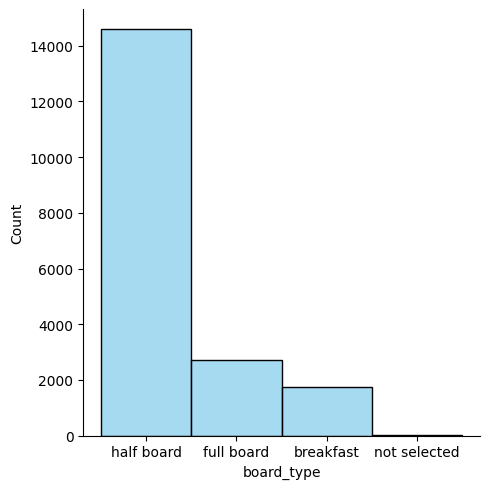

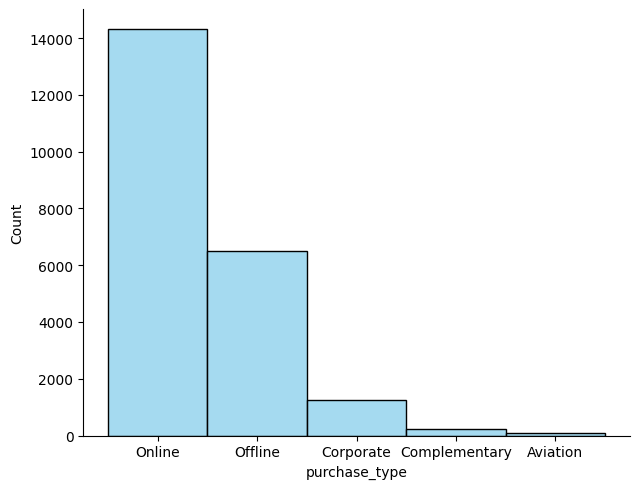

In [12]:
sns.displot(nominal_data, x='board_type', color='skyblue')
sns.displot(nominal_data, x='purchase_type',aspect=1.3, color='skyblue')

### Numerical data:
For numerical data we would like to know the range of values, whether there are outliers, the distribution and other statistics, so first we will draw the histograms.

#### Statistic information:
Describe function show statistic information for numerical data.

In [13]:
numeric_data.describe() 

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled
count,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,27213.000000,27213.000000,27213.000000,23808.000000,27213.000000
mean,0.812810,2.197332,1.712637,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,0.021975,0.155404,0.026421,123.455494,0.327674
std,0.869317,1.403576,1.404446,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,0.346697,1.728693,0.160387,35.136566,0.469374
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,100.300000,0.000000
50%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,119.450000,0.000000
75%,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.000000,0.000000,140.000000,1.000000
max,7.000000,17.000000,7.000000,4.000000,6.000000,4.000000,1.000000,5.000000,532.000000,13.000000,57.000000,1.000000,560.000000,1.000000


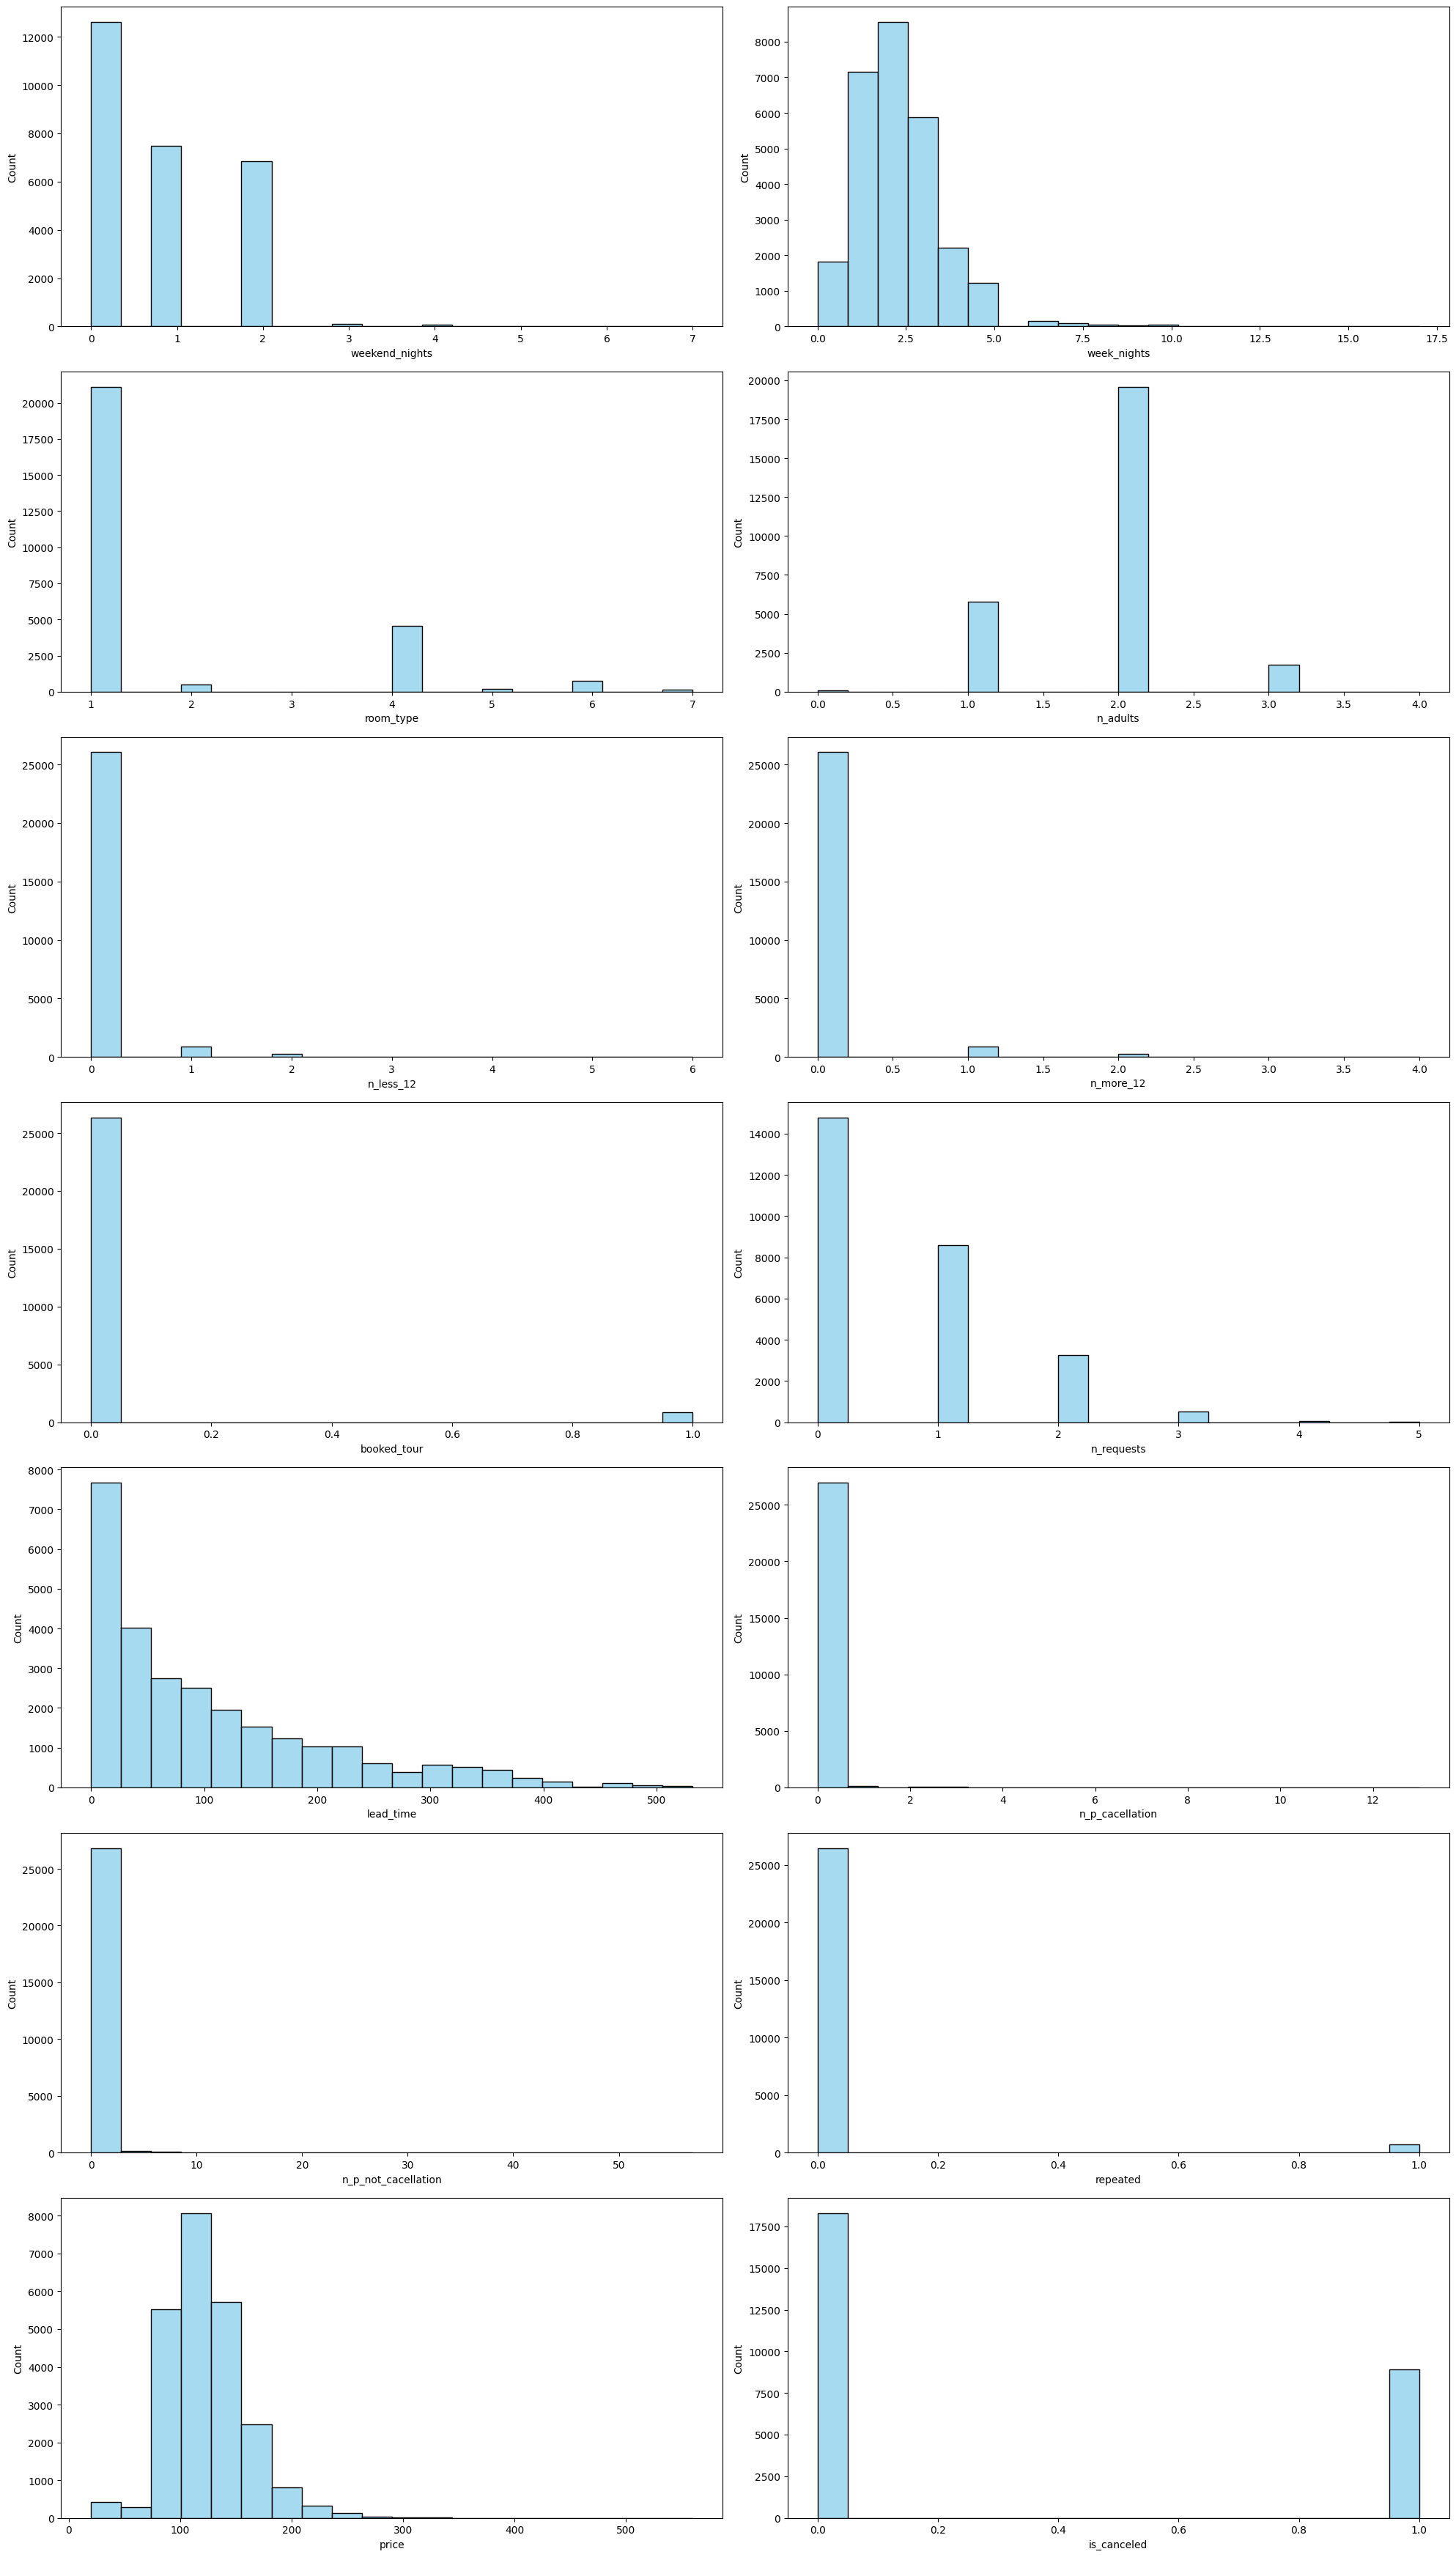

In [14]:
num_cols = 2
num_rows = (len(numeric_col) + num_cols - 1) // num_cols  # Ceiling division

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

for idx, col in enumerate(numeric_col):
    row = idx // num_cols
    col_idx = idx % num_cols
    sns.histplot(numeric_data[col], bins=20, color='skyblue', ax=axes[row, col_idx])

# Remove any empty subplots if the number of columns is not even
for i in range(len(numeric_col), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

From the histograms above it looks like 'week_nights' and 'price' are normal distributed whereas the other attributes are not. Moreover, it seems the 'lead_time' exponentially distributed and we can see that 'room_type' has only few values with importance to the order (assumption) i.e. it's a categorical ordinal attribute.

#### Skweness

In [15]:
# Calculate skewness for each column and store in a dictionary
skewness_dict = {col: numeric_data[col].skew(axis=0, skipna=True) for col in numeric_col}

# Sort the dictionary by skewness values in descending order
sorted_skewness = {k: v for k, v in sorted(skewness_dict.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted skewness values
for col, skew in sorted_skewness.items():
    print(f'{col} skewness: {skew}')

n_p_cacellation skewness: 26.0690397337534
n_p_not_cacellation skewness: 19.07680621229512
repeated skewness: 5.905877062919078
n_less_12 skewness: 5.749665488234375
n_more_12 skewness: 5.569096359968911
booked_tour skewness: 5.341578775705141
room_type skewness: 1.725495758860717
week_nights skewness: 1.5422954469230514
lead_time skewness: 1.291447308852505
n_requests skewness: 1.1437446108569245
is_canceled skewness: 0.7343329511244617
weekend_nights skewness: 0.7187888765659908
price skewness: 0.682392611272259
n_adults skewness: -0.32416096529704014


~~~ DELETE *As we can see at the graphs and from the skewness calculation,'n_less_12' and 'n_more_12' column have long right tail that indicate on asymmrtric distribution while 'price' and 'weekend_nights' are more symmetric.

#### probability

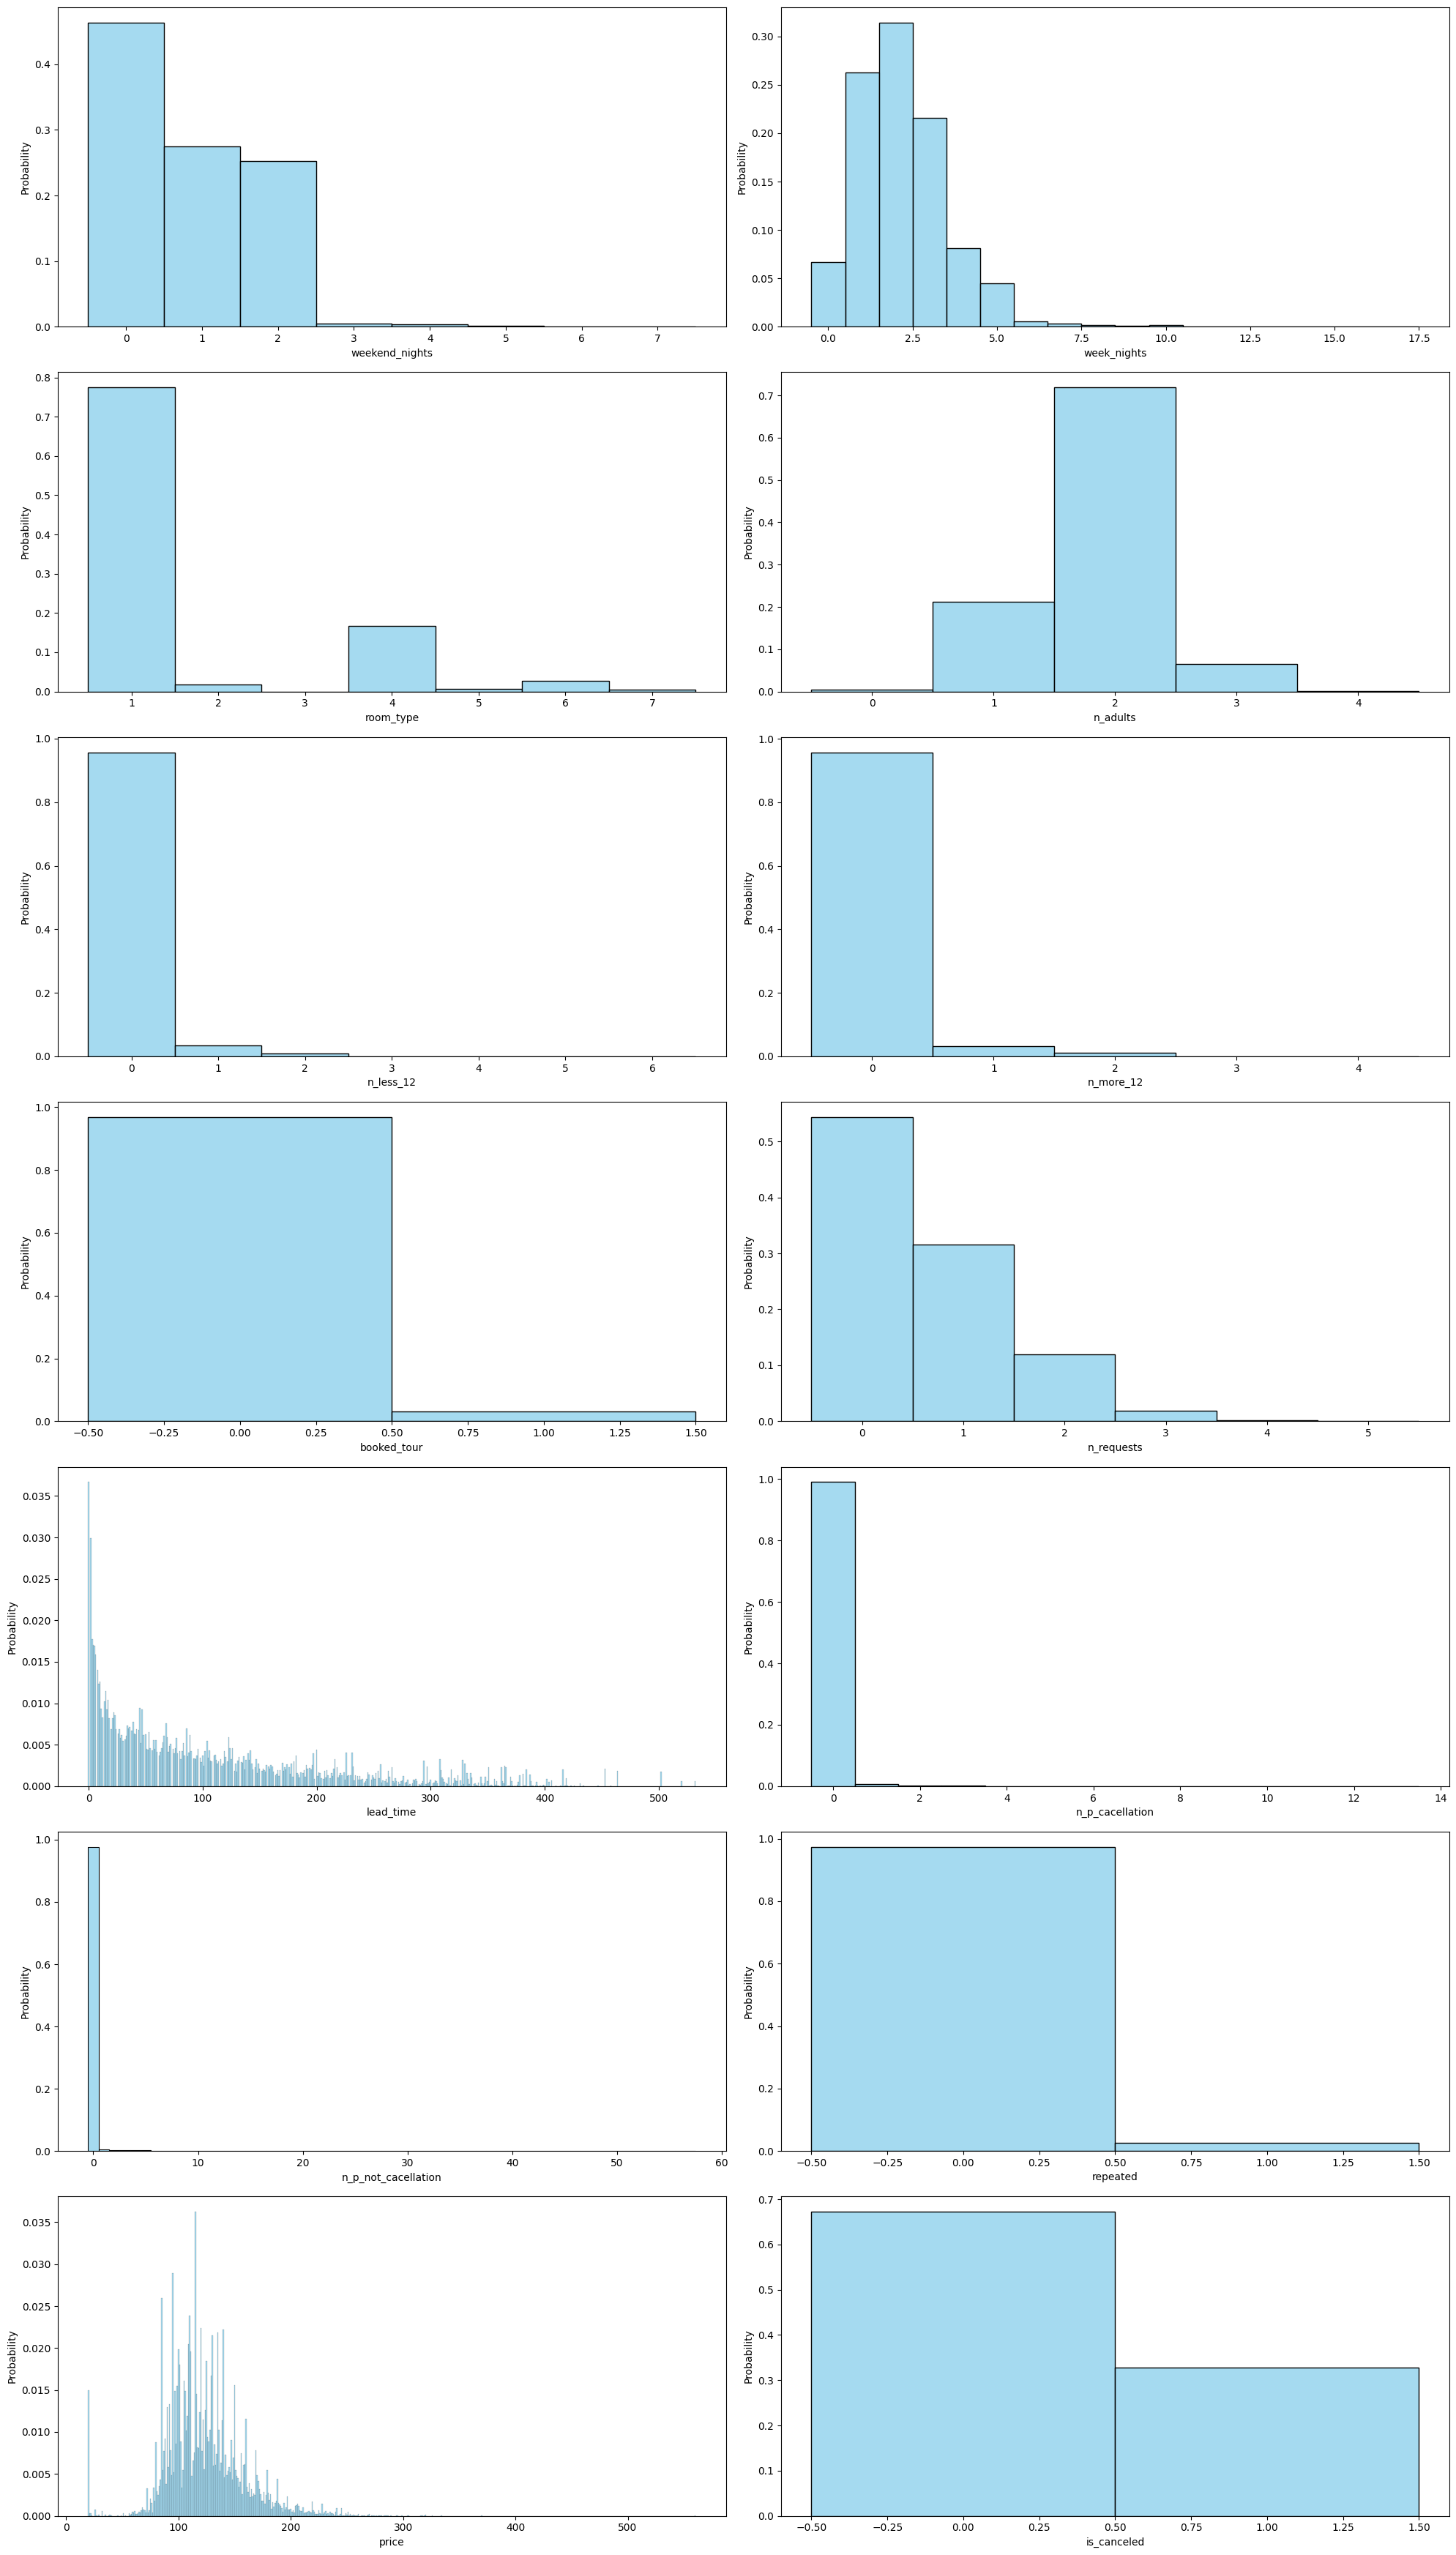

In [16]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

for idx, col in enumerate(numeric_col):
    row = idx // num_cols
    col_idx = idx % num_cols
    sns.histplot(numeric_data[col], color='skyblue', stat="probability", discrete=True, ax=axes[row, col_idx])

# Remove any empty subplots if the number of columns is not even
for i in range(len(numeric_col), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

#### Categorial ordinal attribute - 'room_type'

In [17]:
print(numeric_data['room_type'].value_counts().sort_index())

room_type
1    21084
2      511
3        3
4     4571
5      180
6      741
7      123
Name: count, dtype: int64


Boxplot:

<Axes: ylabel='price'>

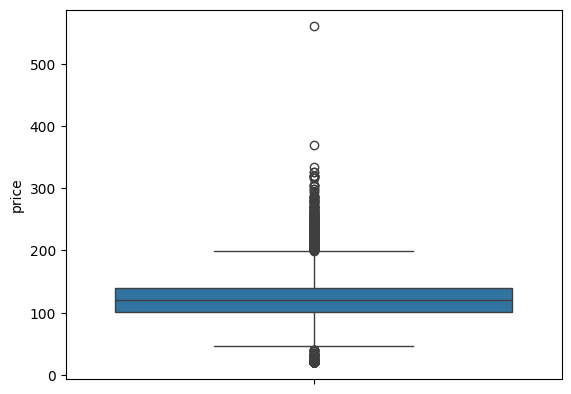

In [18]:
sns.boxplot(y="price", data=train_df)

From this boxplot, we can conclude that most of the prices are concentrated between 100 and 140, with a few higher outliers. The median price is around 120. There is a notable spread in the data, with prices ranging from around 40 to 200 within the whiskers, and some extreme values extending up to 550.

#### Insights from the boxplot:
##### Median:
The thick line inside the box represents the median price. It appears to be around 120, indicating that half of the prices are below this value, and half are above.

##### Interquartile Range (IQR): 
The box itself represents the interquartile range, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). This range shows where the middle 50% of the data lies. The bottom of the box is around 100, and the top of the box is around 140.

##### Whiskers:
The lines extending from the top and bottom of the box are called whiskers. They represent 1.5 times the IQR above the third quartile and below the first quartile. The lower whisker extends to around 40, and the upper whisker extends to around 200.

##### Outliers:
The dots beyond the whiskers represent outliers. These are values that are significantly higher or lower than the rest of the data. In this plot, there are several outliers above the upper whisker, with the highest outlier being around 550.

### Target

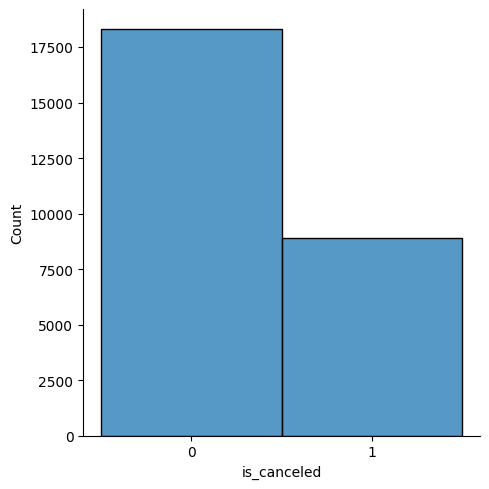

In [19]:
sns.displot(train_target, x='is_canceled', discrete=True)

# Set x-axis ticks to [0, 1]
plt.xticks([0, 1])

# Display the plot
plt.show()

#### Pie chart

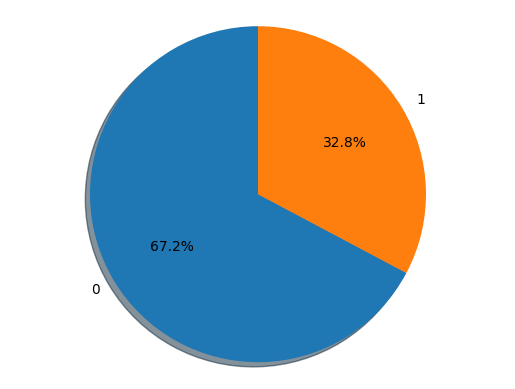

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(train_target['is_canceled'].value_counts(), labels=train_target['is_canceled'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

## 3. Attributes correlations

In [21]:
corr_matrix = train_df[train_df.describe().columns].corr(method = 'pearson')  # check for correlation, more then +-0.3 there is a little bit connection
corr_matrix

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled
weekend_nights,1.000000,0.172582,0.060986,0.106355,0.019048,0.020736,-0.033336,0.060688,0.045434,-0.023784,-0.029500,-0.072326,-0.000601,0.066571
week_nights,0.172582,1.000000,0.093326,0.105197,0.009291,0.020412,-0.052188,0.046046,0.149524,-0.027565,-0.048246,-0.100375,0.020085,0.093008
room_type,0.060986,0.093326,1.000000,0.270896,0.276393,0.278152,0.039589,0.145410,-0.106801,-0.006050,-0.009804,-0.023882,0.469287,0.026948
n_adults,0.106355,0.105197,0.270896,1.000000,-0.005528,-0.022964,0.009166,0.188380,0.096608,-0.046387,-0.124772,-0.199585,0.301024,0.087098
n_less_12,0.019048,0.009291,0.276393,-0.005528,1.000000,0.125932,0.036395,0.094793,-0.040479,-0.012620,-0.015822,-0.025912,0.257406,0.022208
n_more_12,0.020736,0.020412,0.278152,-0.022964,0.125932,1.000000,0.020203,0.099084,-0.033408,-0.012587,-0.017378,-0.029303,0.252388,0.023083
booked_tour,-0.033336,-0.052188,0.039589,0.009166,0.036395,0.020203,1.000000,0.091335,-0.062729,0.021167,0.068105,0.113914,0.057756,-0.086230
n_requests,0.060688,0.046046,0.145410,0.188380,0.094793,0.099084,0.091335,1.000000,-0.099829,0.000753,0.030748,-0.009791,0.179417,-0.250765
lead_time,0.045434,0.149524,-0.106801,0.096608,-0.040479,-0.033408,-0.062729,-0.099829,1.000000,-0.047808,-0.080618,-0.139704,-0.063702,0.436932
n_p_cacellation,-0.023784,-0.027565,-0.006050,-0.046387,-0.012620,-0.012587,0.021167,0.000753,-0.047808,1.000000,0.473422,0.384761,-0.062945,-0.036572


Visualization of the correlation matrix

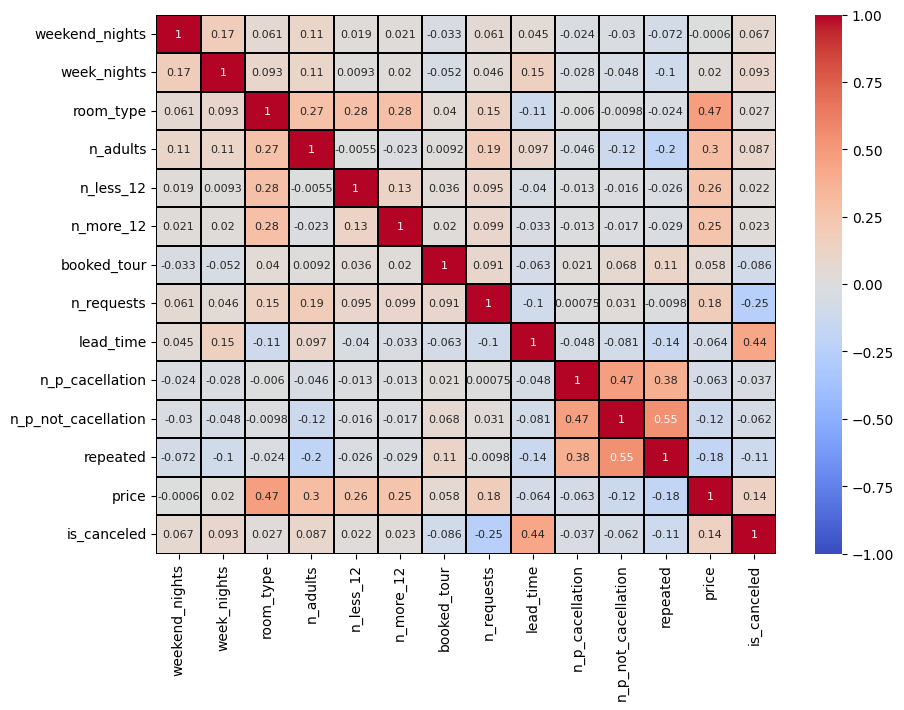

In [22]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black', annot_kws={'size': 8})

We can see that the attribute with the strongest correlation to our target value 'is_canceled' is 'lead_time'.

Moreover, we can see strong correlation between 'room_type' and 'price' which is obvious because some of the room types cost more than others. 
Other strong correlations we can see between 'n_p_cacellation' and 'n_p_not_cacellation, and between 'n_p_not_cacellation and 'repeated'(and also smaller correlation between 'repeated' and 'n_p_cacellation').

Those three attributes describe:

    • 'repeated': indicates whether the reservation is a repeat reservation
    • 'n_p_cacellation': number of previous reservations that were canceled by the customer prior to the current reservation
    • 'n_p_not_cacellation': number of previous reservations not canceled by the customer prior to the current reservation 
It's making sense those three have correlation because just if reservation is a repeat reservation there is a chance that the customer had prior reservation which might got canceled (and then increase the 'n_p_cacellation' or not and then increase the attribute 'n_p_not_cacellation').

We can see other smaller correlation between 'n_adults' and 'price' which also obvious because when you have more adults the price getting higher. 

## 4. Interesting insights from the data

As been said in the privous note - the attribute with the strongest correlation to our target value 'is_canceled' is 'lead_time'.

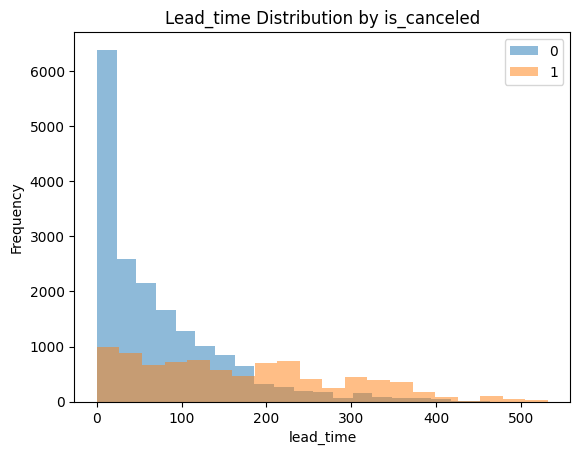

In [23]:
train_df.groupby('is_canceled')['lead_time'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('lead_time')
plt.ylabel('Frequency')
plt.title('Lead_time Distribution by is_canceled')
plt.show()

'lead_time' represents the number of days between the reservation date and the arrival date.
We can see from the above plot and the correlation that when the lead time is greater - there are more chances the reservation will get canceled.

It's also seems that 'n_requests' has a small negative correlation to the target value:

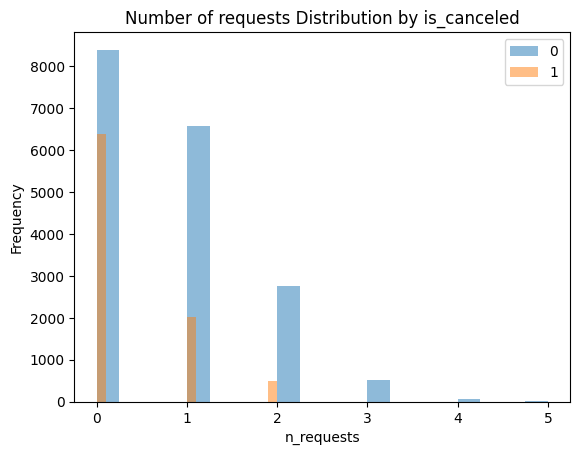

In [24]:
train_df.groupby('is_canceled')['n_requests'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('n_requests')
plt.ylabel('Frequency')
plt.title('Number of requests Distribution by is_canceled')
plt.show()

We can see here the negative correlation relation we've talked about - It's seeming like when the number of requests is higher there is lower probability the reservation will get canceled.

Another insight we can see is when the price is greater - there are more chances the reservation will get canceled.

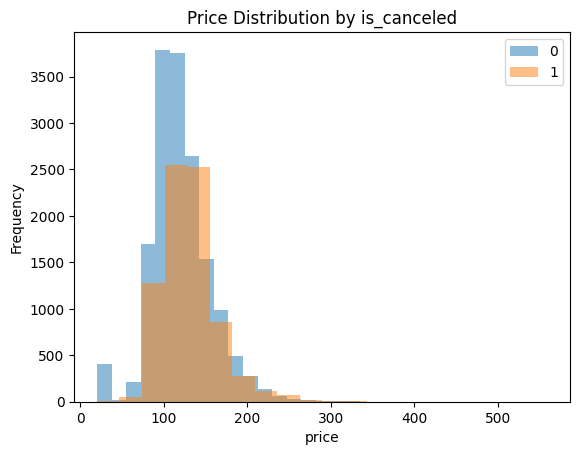

In [25]:
train_df.groupby('is_canceled')['price'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Price Distribution by is_canceled')
plt.show()



## 5. Data Cleaning

Now, we are going to investigate the given dataset, and search for problems in the data such as missing values and inconsistency.

We are going to start with handling the missing values and checking for data types.

In [26]:
# Check for missing values in the training dataset
missing_values_count = train_df.isnull().sum()
missing_values_percentage = (train_df.isnull().sum() / train_df.shape[0]) * 100

# Combine the counts and percentages into a DataFrame
missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

# Display the columns with missing values
missing_values_df = missing_values_df[missing_values_df['Missing Values Count'] > 0]

print(missing_values_df)

               Missing Values Count  Missing Values Percentage
board_type                     8168                  30.015066
lead_time                       419                   1.539705
purchase_type                  4847                  17.811340
price                          3405                  12.512402


We can see that in the training set there are missing values in the attributes - board_type, lead_time, purchase_type and price.
We can determine that there is a significant missing values in the attributes - board_type purchase_type and price, and the most significant is in the board_type attribute.
We will fill missing values for lead_time by its median, the price with its (strong, as we see in the correlation matrix) corelation with the room_type, the board_type by its probability distribution, and the purchase_type by its mode. Then, we encode to numbers the categorical types. 

In [27]:
# Fill missing values for lead_time by median
train_df['lead_time'].fillna(train_df['lead_time'].median(), inplace=True)

For class  1  the median is  114.5
For class  1  the mean is  115.88661138211383
and the number of missing values is  2634 out of  21084 rows
For class  2  the median is  105.85499999999999
For class  2  the mean is  108.92675438596491
and the number of missing values is  55 out of  511 rows
For class  3  the median is  100.75
For class  3  the mean is  111.91666666666667
and the number of missing values is  0 out of  3 rows
For class  4  the median is  147.65
For class  4  the mean is  145.5463647767185
and the number of missing values is  585 out of  4571 rows
For class  5  the median is  139.4
For class  5  the mean is  143.66717948717948
and the number of missing values is  24 out of  180 rows
For class  6  the median is  200.2
For class  6  the mean is  200.2548049921997
and the number of missing values is  100 out of  741 rows
For class  7  the median is  212.245
For class  7  the mean is  174.05896551724138
and the number of missing values is  7 out of  123 rows


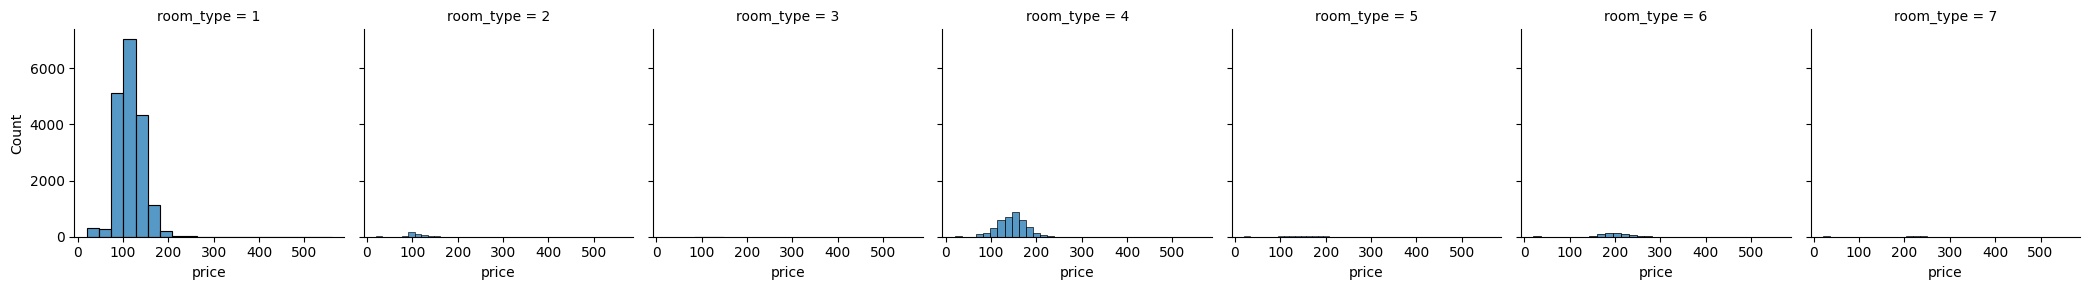

In [28]:
# Fill missing values of 'price' by its correlation with 'room_type' - by the correlation matrix we see that the correlation is 0.47
# therefore it is an option to divide into groups, conforming to this attribute, and in each group we will complete the value according to the
# statistics.
g = sns.FacetGrid(train_df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)

for i in sorted(train_df['room_type'].unique()):
    print('For class ', i, ' the median is ', train_df.loc[train_df['room_type']==i,
        'price'].median())
    print('For class ', i, ' the mean is ', train_df.loc[train_df['room_type']==i,
        'price'].mean())
    print('and the number of missing values is ',
        train_df.loc[train_df['room_type']==i , 'price'].isnull().sum(),
        'out of ',(train_df['room_type']==i).sum(), 'rows')
    

# We see that we got that class 3 of 'room_type', there are any missing values for 'price',
# therefore we will skip it. The rest will be filled by the probability function of every class.

# Calculate mean and standard deviation for each room_type:
mu_sigma = {}
for room_type in sorted(train_df['room_type'].unique()):
    mu = train_df.loc[train_df['room_type'] == room_type, 'price'].mean()
    sigma = train_df.loc[train_df['room_type'] == room_type, 'price'].std()
    mu_sigma[room_type] = (mu, sigma)

# Define a function to fill missing 'price' values based on 'room_type'
def fill_missing_price(row):
    if pd.isna(row['price']):
        room_type = row['room_type']
        if room_type in mu_sigma:
            mu, sigma = mu_sigma[room_type]
            return np.random.normal(mu, sigma)
    else:
        return row['price']

# Apply the function to the DataFrame
train_df['price'] = train_df.apply(fill_missing_price, axis=1)

In [29]:
# Fill missing values for categorical variable - board_type by probability

# Calculate the probability distribution of the existing values
value_counts = train_df['board_type'].value_counts(normalize=True)

# Function to fill NaN values based on the probability distribution
def fill_with_probability(value_counts):
    return np.random.choice(value_counts.index, p=value_counts.values)

# Apply the function to fill NaN values
train_df['board_type'] = train_df['board_type'].apply(lambda x: fill_with_probability(value_counts) if pd.isnull(x) else x)

# we converting those values to numeric values
train_df['board_type'] = train_df['board_type'].astype('category').cat.codes

In [30]:
# Fill missing values for categorical variables - purchase_type by correlation to price
train_df['purchase_type'].fillna(train_df['purchase_type'].mode()[0], inplace=True)

# we converting those values to numeric values
train_df['purchase_type'] = train_df['purchase_type'].astype('category').cat.codes

train_df.head()

# Verify if missing values have been handled
missing_values = train_df.isnull().sum()

if missing_values.any():
    print("There are missing values in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("There are no missing values in the DataFrame now.")

There are no missing values in the DataFrame now.


We see that now we complete the missing values, with reliable values.

## 6.  Add / Delete Attributes

We can notice that the 'ID' attribute is just a generic string which give us no information, so we already deleted this attribute.

Moreover, in order to analyze the data regards to the 'date' attribute, we will split the 'date' attribute into three new nominal categorical attributes- 'day_date', 'month_date', 'year_date'.
We see, for example, impossible date, such as 2018-2-29, which is invalid because 29 on February can be only in leap years, and 2018 is not a leap year. Such dates are handled as NaT values, and we drop all the  raws with NaT value, since there are not many of them and because it is almost impossible to fix them correctly. 

In [31]:
# Convert 'date' column to datetime format with flexible parsing and handle invalid dates
train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce', infer_datetime_format=True)

# Handle NaT values (e.g., drop rows with NaT values)
train_df = train_df.dropna(subset=['date'])

# Extract components into new columns
train_df['year'] = train_df['date'].dt.year.astype(int)
train_df['month'] = train_df['date'].dt.month.astype(int)
train_df['day'] = train_df['date'].dt.day.astype(int)

# Drop the original 'date' column
train_df.drop(columns=['date'], inplace=True)

print("DataFrame with extracted components:")
print(train_df.columns)

DataFrame with extracted components:
Index(['weekend_nights', 'week_nights', 'room_type', 'board_type', 'n_adults',
       'n_less_12', 'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'purchase_type', 'n_p_cacellation', 'n_p_not_cacellation', 'repeated',
       'price', 'is_canceled', 'year', 'month', 'day'],
      dtype='object')


Now, we will check the data types and address inconsistencies.

In [32]:
# Check data types of the columns
data_types = train_df.dtypes
print(data_types)

# Check for mixed data types in each column
have_dup = 0
for column in train_df.columns:
    unique_types = train_df[column].apply(type).nunique()
    if unique_types > 1:
        have_dup = 1
        print(f'Column {column} has mixed data types')
if have_dup == 0:
    print("There are no duplicate columns.")

weekend_nights           int64
week_nights              int64
room_type                int32
board_type                int8
n_adults                 int64
n_less_12                int64
n_more_12                int64
booked_tour              int64
n_requests               int64
lead_time              float64
purchase_type             int8
n_p_cacellation          int64
n_p_not_cacellation      int64
repeated                 int64
price                  float64
is_canceled              int64
year                     int32
month                    int32
day                      int32
dtype: object
There are no duplicate columns.


We can see that we don't have any mixed data types for every given attribute.

Columns with strings are stored with the 'object' type. 
We can see that there are some inconsistencies at the board_type, purchase_type, date attributes.
We can see that we don't have mixed data types. We also don't have any duplicate raws.


## 7. Data transformation

Now we will do normalization to numierical attributes using  and discretization.

In [33]:
scaler = MinMaxScaler()
train_df[train_df.columns.tolist()] = scaler.fit_transform(train_df[train_df.columns.tolist()])

Now we will save the pre-processed training dataset.

In [34]:
train_df.to_csv("./hotels_train_pre_processed.csv", index=False)

## 8. Implementation of the Pre-Process: Test Dataset

In [35]:
test_df = pd.read_csv("./hotels_test.csv")
test_df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
0,INN16062,0,2,Room_Type 4,NaN,2,1,0,0,1,132.0,Online,0,0,0,141.59,5/13/2018
1,INN09467,0,2,Room_Type 2,half board,1,0,0,0,0,159.0,Online,0,0,0,90.56,8/30/2018
2,INN07689,1,4,Room_Type 7,NaN,3,0,0,0,2,32.0,NaN,0,0,0,NaN,9/28/2018
3,INN28642,2,1,Room_Type 1,NaN,2,0,0,0,0,38.0,NaN,0,0,0,NaN,09/11/2018
4,INN34082,1,4,Room_Type 1,half board,2,0,0,0,1,88.0,Online,0,0,0,99.05,3/16/2018


Now, we will follow the pre-proccesing steps that we did for the training dataset, and apply them of the test dataset.
First, we will fill the missing values.

In [36]:
# Check for missing values in the training dataset
missing_values_count = test_df.isnull().sum()
missing_values_percentage = (test_df.isnull().sum() / test_df.shape[0]) * 100

# Combine the counts and percentages into a DataFrame
missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

# Display the columns with missing values
missing_values_df = missing_values_df[missing_values_df['Missing Values Count'] > 0]

print(missing_values_df)

               Missing Values Count  Missing Values Percentage
board_type                     2717                  29.949295
lead_time                       125                   1.377866
purchase_type                  1611                  17.757937
price                          1130                  12.455908


We see that we have the same attributes of missing values like we had for the testing, and about the same percentage for each of the types, so we will treat them in the same way as we did for the training dataset. 

In [37]:
# Fill missing values for lead_time by median
test_df['lead_time'].fillna(test_df['lead_time'].median(), inplace=True)

For class  Room_Type 1  the median is  114.5
For class  Room_Type 1  the mean is  115.79697327935223
and the number of missing values is  879 out of  7054 rows
For class  Room_Type 2  the median is  103.83
For class  Room_Type 2  the mean is  104.9865060240964
and the number of missing values is  15 out of  181 rows
For class  Room_Type 3  the median is  20.0
For class  Room_Type 3  the mean is  63.333333333333336
and the number of missing values is  1 out of  4 rows
For class  Room_Type 4  the median is  146.28
For class  Room_Type 4  the mean is  143.2447017815647
and the number of missing values is  197 out of  1488 rows
For class  Room_Type 5  the median is  146.75
For class  Room_Type 5  the mean is  146.07618421052632
and the number of missing values is  9 out of  85 rows
For class  Room_Type 6  the median is  207.48000000000002
For class  Room_Type 6  the mean is  205.3928
and the number of missing values is  25 out of  225 rows
For class  Room_Type 7  the median is  204.52
For 

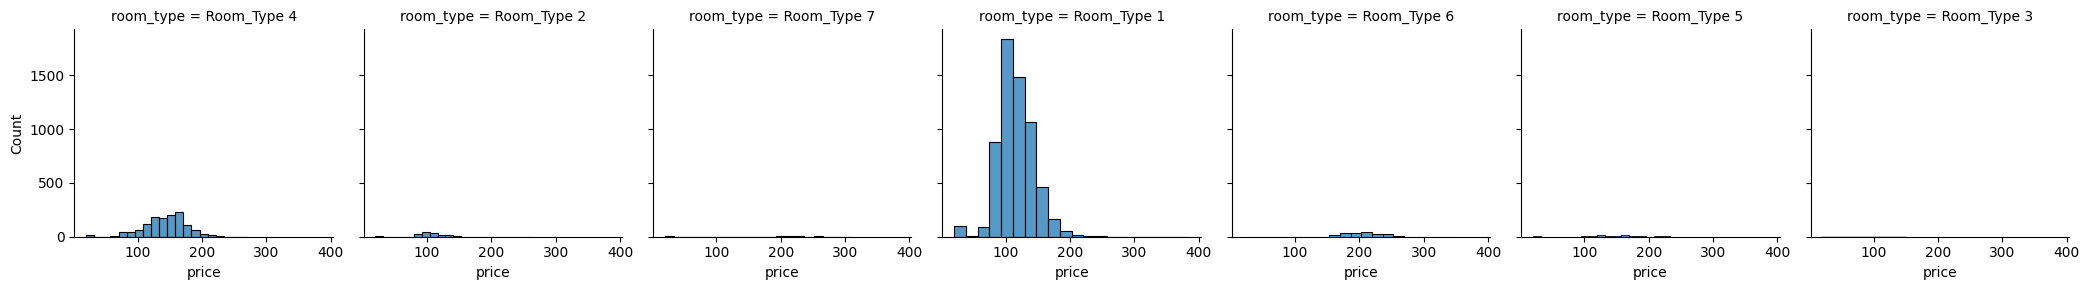

In [38]:
g = sns.FacetGrid(test_df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)

for i in sorted(test_df['room_type'].unique()):
    print('For class ', i, ' the median is ', test_df.loc[test_df['room_type']==i,
        'price'].median())
    print('For class ', i, ' the mean is ', test_df.loc[test_df['room_type']==i,
        'price'].mean())
    print('and the number of missing values is ',
        test_df.loc[test_df['room_type']==i , 'price'].isnull().sum(),
        'out of ',(test_df['room_type']==i).sum(), 'rows')
    
# Calculate mean and standard deviation for each room_type:
mu_sigma = {}
for room_type in sorted(test_df['room_type'].unique()):
    mu = test_df.loc[test_df['room_type'] == room_type, 'price'].mean()
    sigma = test_df.loc[test_df['room_type'] == room_type, 'price'].std()
    mu_sigma[room_type] = (mu, sigma)

# Define a function to fill missing 'price' values based on 'room_type'
def fill_missing_price(row):
    if pd.isna(row['price']):
        room_type = row['room_type']
        if room_type in mu_sigma:
            mu, sigma = mu_sigma[room_type]
            return np.random.normal(mu, sigma)
    else:
        return row['price']

# Apply the function to the DataFrame
test_df['price'] = test_df.apply(fill_missing_price, axis=1)


# Verify if missing values have been handled
missing_values = test_df.isnull().sum()

if missing_values.any():
    print("There are missing values in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("There are no missing values in the DataFrame now.")

In [39]:
# Fill missing values for categorical variable - board_type by probability

# Calculate the probability distribution of the existing values
value_counts = test_df['board_type'].value_counts(normalize=True)

# Function to fill NaN values based on the probability distribution
def fill_with_probability(value_counts):
    return np.random.choice(value_counts.index, p=value_counts.values)

# Apply the function to fill NaN values
test_df['board_type'] = test_df['board_type'].apply(lambda x: fill_with_probability(value_counts) if pd.isnull(x) else x)

# we converting those values to numeric values
test_df['board_type'] = test_df['board_type'].astype('category').cat.codes

In [40]:
# Fill missing values for categorical variables - purchase_type by correlation to price
test_df['purchase_type'].fillna(test_df['purchase_type'].mode()[0], inplace=True)

# we converting those values to numeric values
test_df['purchase_type'] = test_df['purchase_type'].astype('category').cat.codes

test_df.head()

# Verify if missing values have been handled
missing_values = test_df.isnull().sum()

if missing_values.any():
    print("There are missing values in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("There are no missing values in the DataFrame now.")

There are no missing values in the DataFrame now.


Now, we will add day, month, year columns and delete the ID columns, as we did for the training dataset.

In [41]:
# Convert 'date' column to datetime format with flexible parsing and handle invalid dates
test_df['date'] = pd.to_datetime(test_df['date'], errors='coerce', infer_datetime_format=True)

# Handle NaT values (e.g., drop rows with NaT values)
test_df = test_df.dropna(subset=['date'])

# Extract components into new columns
test_df['year'] = test_df['date'].dt.year.astype(int)
test_df['month'] = test_df['date'].dt.month.astype(int)
test_df['day'] = test_df['date'].dt.day.astype(int)

# Drop the original 'date' column
test_df.drop(columns=['date'], inplace=True)

print("DataFrame with extracted components:")
print(test_df.columns)

DataFrame with extracted components:
Index(['ID', 'weekend_nights', 'week_nights', 'room_type', 'board_type',
       'n_adults', 'n_less_12', 'n_more_12', 'booked_tour', 'n_requests',
       'lead_time', 'purchase_type', 'n_p_cacellation', 'n_p_not_cacellation',
       'repeated', 'price', 'year', 'month', 'day'],
      dtype='object')


In [42]:
# DELETE ZC

ZC_IDTESTCOL = test_df['ID'] 

In [43]:
test_df = test_df.drop(['ID'], axis=1)

We will write room_type as its numeric value for more comfortable interpretation.

In [44]:
test_df['room_type'] = test_df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)  #d - numeric values
test_df['room_type'].dtype

dtype('int32')

Now we will check for inconsistencies in the attributes, like negative attributes that should be non-negative - they should be removed.

In [45]:
# Now we will complete the checking for the rest of the non-negative attributes:
# List of attributes to check:
attributes = ['weekend_nights', 'week_nights', 'room_type', 'n_adults', 'n_less_12',
              'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
              'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'price']

# Check for negative values in each attribute
for attr in attributes:
    # Print the number of negative values for each attribute
    negative_count = (test_df[attr] < 0).sum()
    if (negative_count> 0):
        print(f'Number of negative values in {attr}: {negative_count}. remove them.')
        # Remove rows where the attribute has negative values
        test_df = test_df[test_df[attr] >= 0]


# Check data types of the columns
data_types = test_df.dtypes
print(data_types)

# Check for mixed data types in each column
have_dup = 0
for column in test_df.columns:
    unique_types = test_df[column].apply(type).nunique()
    if unique_types > 1:
        have_dup = 1
        print(f'Column {column} has mixed data types')
if have_dup == 0:
    print("There are any duplicate columns.")

weekend_nights           int64
week_nights              int64
room_type                int32
board_type                int8
n_adults                 int64
n_less_12                int64
n_more_12                int64
booked_tour              int64
n_requests               int64
lead_time              float64
purchase_type             int8
n_p_cacellation          int64
n_p_not_cacellation      int64
repeated                 int64
price                  float64
year                     int32
month                    int32
day                      int32
dtype: object
There are any duplicate columns.


Now we will normalize the test dataset.

In [46]:
scaler = MinMaxScaler()
test_df[test_df.columns.tolist()] = scaler.fit_transform(test_df[test_df.columns.tolist()])

Now we will save the pre-processed test dataset.

In [47]:
test_df.to_csv("./hotels_test_pre_processed.csv", index=False)

## 9. Splitting Data to Train and Validation Set and Using of Cross-Validation Method

In [48]:
# Splitting the features (X) and results (y) for train and validation.
# We determine the seed to be 42 and the validation to be 0.25 of all the original training data.
X = train_df.drop(['is_canceled'], axis=1)
y = train_df['is_canceled']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=42) 

# for cross validation we will use 10 splits
kf = 10

## 10. Evaluation Metrics

The most appropriate evaluation metrics for this problem, similarly to what we saw in class, are the Accuracy and the ROC AUC.
They are the most appropriate metrics for this problem because they together offer a complete picture of model performance. Accuracy provides a simple measure of overall correctness, while ROC AUC ensures the model's performance is evaluated in distinguishing between bookings that are canceled and those that are not, even in the presence of any class imbalance.

### Classification Decision Tree (classifier a):

In [37]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf_dt = clf_dt.fit(X_train,y_train)

# Predict the label
y_pred_dt = clf_dt.predict(X_validation)

print(f"Accuracy of model on validation set: {accuracy_score(y_validation, y_pred_dt)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_dt.predict(X_train))}")

Accuracy of model on validation set: 0.8399293806090923
Accuracy of model on training set: 0.99612536171465


#### We can see overfitting here
Configure a better model by limits the size of the tree.

In [38]:
clf_dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8,
                              min_samples_split=10, min_samples_leaf=5, random_state=42) 

clf_dt = clf_dt.fit(X_train,y_train)
y_pred_dt = clf_dt.predict(X_validation)


print(f"Accuracy of model on validation set: {accuracy_score(y_validation, y_pred_dt)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_dt.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_dt)}")
print(f"classification report :\n{classification_report(y_validation,y_pred_dt)}")

y_probs_dt = clf_dt.predict_proba(X_validation) # probability prediction
fpr_dt, tpr_dt, threshold = roc_curve(y_validation, y_probs_dt[:,1])
auc_dt = auc(fpr_dt, tpr_dt)
print(f"AUC: {auc_dt}")

Accuracy of model on validation set: 0.8422833603060174
Accuracy of model on training set: 0.8446221001520428
Confusion matrix on validation set:
[[4047  522]
 [ 550 1678]]
classification report :
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      4569
         1.0       0.76      0.75      0.76      2228

    accuracy                           0.84      6797
   macro avg       0.82      0.82      0.82      6797
weighted avg       0.84      0.84      0.84      6797

AUC: 0.905197160396757


we can see the accuracy of the model similar to the accuracy on the train so there is no more overfitting

#### Decision tree visualization
One of the decision trees advantages is the ability to visualize the decision rules and therefore they are easy to understand and interpret. 



In [39]:
# dot = export_graphviz(clf_dt, filled=True, rounded=True, 
#                 special_characters=True,feature_names = X.columns,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot)  
# graph.write_png('./tree1.png')
# Image(graph.create_png())

### SVM classifier (classifier b):

In [40]:
clf_svm = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_validation)


print(f"Accuracy of model on validation set: {accuracy_score(y_validation, y_pred_svm)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_svm.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_svm)}")
print(f"classification report :\n{classification_report(y_validation,y_pred_svm)}")

y_probs_svm = clf_svm.predict_proba(X_validation) # probability prediction
fpr_svm, tpr_svm, threshold = roc_curve(y_validation, y_probs_svm[:,1])
auc_svm = auc(fpr_svm, tpr_svm)
print(f"AUC: {auc_svm}")

Accuracy of model on validation set: 0.7375312637928498
Accuracy of model on training set: 0.7275001226151356
Confusion matrix on validation set:
[[4483   86]
 [1698  530]]
classification report :
              precision    recall  f1-score   support

         0.0       0.73      0.98      0.83      4569
         1.0       0.86      0.24      0.37      2228

    accuracy                           0.74      6797
   macro avg       0.79      0.61      0.60      6797
weighted avg       0.77      0.74      0.68      6797

AUC: 0.8315930124683046


### Naive Bayes classifier (classifier c):

In [41]:
clf_nb = GaussianNB()  # assuming the featers have normal gaussian distrubtion
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_validation)


print(f"Accuracy of model on validation set: {accuracy_score(y_validation, y_pred_nb)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_nb.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_nb)}")
print(f"classification report :\n{classification_report(y_validation,y_pred_nb)}")

y_probs_nb = clf_nb.predict_proba(X_validation) # probability prediction
fpr_nb, tpr_nb, threshold = roc_curve(y_validation, y_probs_nb[:,1])
auc_nb = auc(fpr_nb, tpr_nb)
print(f"AUC: {auc_nb}")

Accuracy of model on validation set: 0.4219508606738267
Accuracy of model on training set: 0.41904948746873316
Confusion matrix on validation set:
[[ 678 3891]
 [  38 2190]]
classification report :
              precision    recall  f1-score   support

         0.0       0.95      0.15      0.26      4569
         1.0       0.36      0.98      0.53      2228

    accuracy                           0.42      6797
   macro avg       0.65      0.57      0.39      6797
weighted avg       0.75      0.42      0.35      6797

AUC: 0.807745773660839


### Random Forest  (classifier d):

In [42]:
clf_rf = RandomForestClassifier(random_state = 42)

clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_validation)

# Evaluate the accuracy on the validation set
print(f"parameters:")
pprint(clf_rf.get_params())
print(f"\nAccuracy of model on validation set: {accuracy_score(y_validation, y_pred_rf)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_rf.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_rf)}")
print(f"classification report :\n{classification_report(y_validation,y_pred_rf)}")

y_probs_rf = clf_rf.predict_proba(X_validation) # probability prediction
fpr_rf, tpr_rf, threshold = roc_curve(y_validation, y_probs_rf[:,1])
auc_rf = auc(fpr_rf, tpr_rf)
print(f"AUC: {auc_rf}")

parameters:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Accuracy of model on validation set: 0.883330881271149
Accuracy of model on training set: 0.99612536171465
Confusion matrix on validation set:
[[4279  290]
 [ 503 1725]]
classification report :
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      4569
         1.0       0.86      0.77      0.81      2228

    accuracy                           0.88      6797
   macro avg       0.88      0.86      0.86      6797
weighted avg       0.88      0.88      0.88      6797

AUC: 0.9429297352818327


### Logistic Regression  (classifier e):

In [43]:
# Initialize the logistic regression model
clf_lr = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training data
clf_lr.fit(X_train, y_train)

# Predict on the validation set
y_pred_lr = clf_lr.predict(X_validation)

# Evaluate the accuracy on the validation set
print(f"Parameters:")
pprint(clf_lr.get_params())
print(f"\nAccuracy of model on validation set: {accuracy_score(y_validation, y_pred_lr)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_lr.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_lr)}")
print(f"Classification report:\n{classification_report(y_validation, y_pred_lr)}")

# Probability prediction
y_probs_lr = clf_lr.predict_proba(X_validation)
fpr_lr, tpr_lr, threshold = roc_curve(y_validation, y_probs_lr[:,1])
auc_lr = auc(fpr_lr, tpr_lr)
print(f"AUC: {auc_lr}")

Parameters:
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Accuracy of model on validation set: 0.7950566426364573
Accuracy of model on training set: 0.7911619010250626
Confusion matrix on validation set:
[[4116  453]
 [ 940 1288]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.86      4569
         1.0       0.74      0.58      0.65      2228

    accuracy                           0.80      6797
   macro avg       0.78      0.74      0.75      6797
weighted avg       0.79      0.80      0.79      6797

AUC: 0.852753785659583


### XGBoost  (classifier f):

In [44]:
# Initialize the XGBoost model
clf_xgb = XGBClassifier(random_state=42, use_label_encoder=False)

# Fit the model on the training data
clf_xgb.fit(X_train, y_train)

# Predict on the validation set
y_pred_xgb = clf_xgb.predict(X_validation)

# Evaluate the accuracy on the validation set
print(f"Parameters:")
pprint(clf_xgb.get_params())
print(f"\nAccuracy of model on validation set: {accuracy_score(y_validation, y_pred_xgb)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, clf_xgb.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_xgb)}")
print(f"Classification report:\n{classification_report(y_validation, y_pred_xgb)}")

# Probability prediction
y_probs_xgb = clf_xgb.predict_proba(X_validation)
fpr_xgb, tpr_xgb, threshold = roc_curve(y_validation, y_probs_xgb[:,1])
auc_xgb = auc(fpr_xgb, tpr_xgb)
print(f"AUC: {auc_xgb}")

Parameters:
{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': False,
 'validate_parameters': None,
 'verbosity': None}

Accuracy of model on v

### ROC curve comparison

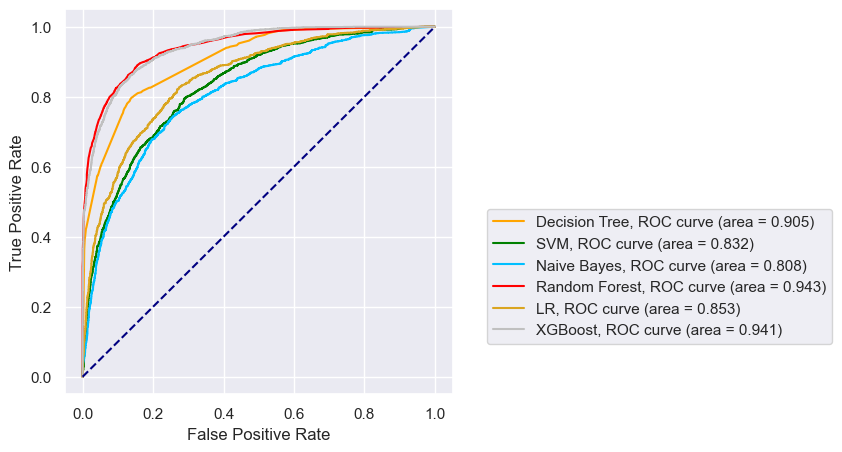

In [57]:
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='orange', label='Decision Tree, ROC curve (area = %0.3f)' %  auc_dt)
plt.plot(fpr_svm, tpr_svm, color='green', label='SVM, ROC curve (area = %0.3f)' %  auc_svm)
plt.plot(fpr_nb, tpr_nb, color='deepskyblue', label='Naive Bayes, ROC curve (area = %0.3f)' %  auc_nb)
plt.plot(fpr_rf, tpr_rf, color='red', label='Random Forest, ROC curve (area = %0.3f)' %  auc_rf)
plt.plot(fpr_lr, tpr_lr, color='goldenrod', label='LR, ROC curve (area = %0.3f)' %  auc_lr)
plt.plot(fpr_xgb, tpr_xgb, color='silver', label='XGBoost, ROC curve (area = %0.3f)' %  auc_xgb)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(2, 0.5))
plt.show()

### Hyperparameter Tuning on decision tree using Grid search
Decision Tree gave the best results and his compute was pretty fast so decided to do wide Hyperparameter tuning on this classifier - We choose to use Grid search and gave pretty wide range of hyperparams because the model is pretty fast.

In [46]:
# Define the parameter grid

param_grid = {
#     'criterion': ['entropy', 'gini'],
        'criterion': ['gini'],

    'splitter': ['best'],
    'max_depth': [int(x) for x in range(10, 20)]  ,
#         'max_depth': [9, 10, 11, 12]  ,

    'min_samples_split': [1, 2, 3, 4, 5, 10, 13, 15, 17, 20],
#         'min_samples_split': [2, 3, 4],

    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 10, 15]
#         'min_samples_leaf': [1, 2]

}

# Initialize GridSearchCV
tree_grid_search = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2)

# Perform grid search with cross-validation on the training set
tree_grid_search.fit(X_train, y_train)

# Extract the best parameters and estimator
tree_best_params = tree_grid_search.best_params_
tree_best_grid = tree_grid_search.best_estimator_

# Fit the best estimator on the entire training set
tree_best_grid.fit(X_train, y_train)

# Predict with the best estimator on the validation set
tree_grid_y_pred = tree_best_grid.predict(X_validation)

# Evaluate the accuracy on the validation set
print(f"Best parameters: {tree_best_params}")
print(f"Accuracy of model on validation set: {accuracy_score(y_validation, tree_grid_y_pred)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, tree_best_grid.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, tree_grid_y_pred)}")
print(f"classification report :\n{classification_report(y_validation,tree_grid_y_pred)}")

y_probs_dt2 = tree_best_grid.predict_proba(X_validation) # probability prediction
fpr_dt2, tpr_dt2, threshold = roc_curve(y_validation, y_probs_dt2[:,1])
auc_dt2 = auc(fpr_dt2, tpr_dt2)
print(f"AUC: {auc_dt2}")

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy of model on validation set: 0.8543475062527586
Accuracy of model on training set: 0.8693413114914905
Confusion matrix on validation set:
[[4065  504]
 [ 486 1742]]
classification report :
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      4569
         1.0       0.78      0.78      0.78      2228

    accuracy                           0.85      6797
   macro avg       0.83      0.84      0.84      6797
weighted avg       0.85      0.85      0.85      6797

AUC: 0.9080429622312256


### Hyperparameter Tuning on SVM using Grid search
SVM gave a little bit lower results in compare to the Decision tree and his running time was very long so we did smaller hyperparameter tuning here.

In [47]:
# Define the parameter grid
param_grid = {'kernel': ['rbf'],
      'C': [0.95, 0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985] ,

    'probability': [True]}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(estimator=clf_svm, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2)

# Perform grid search with cross-validation on the training set
svm_grid_search.fit(X_train, y_train)

# Extract the best parameters and estimator
svm_best_params = svm_grid_search.best_params_
svm_best_grid = svm_grid_search.best_estimator_

# Fit the best estimator on the entire training set
svm_best_grid.fit(X_train, y_train)

# Predict with the best estimator on the validation set
svm_grid_y_pred = svm_best_grid.predict(X_validation)

# Evaluate the accuracy on the validation set
print(f"Best parameters: {svm_best_params}")
print(f"Accuracy of model on validation set: {accuracy_score(y_validation, svm_grid_y_pred)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, svm_best_grid.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, svm_grid_y_pred)}")
print(f"classification report :\n{classification_report(y_validation,svm_grid_y_pred)}")

y_probs_svm2 = svm_best_grid.predict_proba(X_validation) # probability prediction
fpr_svm2, tpr_svm2, threshold = roc_curve(y_validation, y_probs_svm2[:,1])
auc_svm2 = auc(fpr_svm2, tpr_svm2)
print(f"AUC: {auc_svm2}")

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best parameters: {'C': 0.98, 'kernel': 'rbf', 'probability': True}
Accuracy of model on validation set: 0.7454759452699721
Accuracy of model on training set: 0.7339251557212222
Confusion matrix on validation set:
[[4465  104]
 [1626  602]]
classification report :
              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84      4569
         1.0       0.85      0.27      0.41      2228

    accuracy                           0.75      6797
   macro avg       0.79      0.62      0.62      6797
weighted avg       0.77      0.75      0.70      6797

AUC: 0.8320759328438116


### Hyperparameter Tuning on RandomForest using Random & Grid search
first we'll do random comprehensive hyperparameter grid and then we'll do the final tuning with grid search

In [66]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 20)]
max_features = ['auto', 'sqrt', 'log2', 0.2, 0.5, 0.7]
min_samples_leaf = [1, 2, 4]
min_samples_split = [1, 2, 3, 5] 

random_grid ={
    'bootstrap': [True, False],
    'ccp_alpha': [0.0],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini'],
    'max_depth': [None],
    'max_features': max_features,
    'max_leaf_nodes': [None],
    'max_samples': [None],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': n_estimators,
    'oob_score': [False],
    'random_state': [42],
    'warm_start': [True, False]

}



In [67]:
rf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid, n_iter = 2000, cv = kf,
                                verbose=2, random_state = 42, n_jobs = -1)

rf_random.fit(X_train, y_train) # default metric is accuracy (param scoring)
rf_random.best_params_

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


{'warm_start': True,
 'random_state': 42,
 'oob_score': False,
 'n_estimators': 436,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'gini',
 'class_weight': None,
 'ccp_alpha': 0.0,
 'bootstrap': False}

In [68]:
rf_best_grid = rf_random.best_estimator_

# Fit the best estimator on the entire training set
rf_best_grid.fit(X_train, y_train)

# Predict with the best estimator on the validation set
rf_grid_y_pred = rf_best_grid.predict(X_validation)

# Evaluate the accuracy on the validation set
print(f"Best parameters: {rf_random.best_params_}")
print(f"Accuracy of model on validation set: {accuracy_score(y_validation, rf_grid_y_pred)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, rf_best_grid.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, rf_grid_y_pred)}")
print(f"classification report :\n{classification_report(y_validation,rf_grid_y_pred)}")
y_probs_rf2 = rf_best_grid.predict_proba(X_validation) # probability prediction
fpr_rf2, tpr_rf2, threshold = roc_curve(y_validation, y_probs_rf2[:,1])
auc_rf2 = auc(fpr_rf2, tpr_rf2)
print(f"AUC: {auc_rf2}")

Best parameters: {'warm_start': True, 'random_state': 42, 'oob_score': False, 'n_estimators': 436, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 5, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0.0, 'bootstrap': False}
Accuracy of model on validation set: 0.8828895100779756
Accuracy of model on training set: 0.9955858551179557
Confusion matrix on validation set:
[[4274  295]
 [ 501 1727]]
classification report :
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.91      4569
         1.0       0.85      0.78      0.81      2228

    accuracy                           0.88      6797
   macro avg       0.87      0.86      0.86      6797
weighted avg       0.88      0.88      0.88      6797

AUC: 0.9441702394522763


Grid search base on the default & random search results

In [71]:
n_estimators = [int(x) for x in np.linspace(start = 350, stop = 500, num = 20)]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [2, 3, 5, 7] 

param_grid ={
    'bootstrap': [False],
    'ccp_alpha': [0.0],
    'class_weight': [None],
    'criterion': ['gini'],
    'max_depth': [None],
    'max_features': max_features,
    'max_leaf_nodes': [None],
    'max_samples': [None],
    'min_impurity_decrease': [0.0],
    'min_samples_leaf': [1],
    'min_samples_split': min_samples_split,
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': n_estimators,
    'oob_score': [False],
    'random_state': [42],
    'warm_start': [True]

}
   

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2)

# Perform grid search with cross-validation on the training set
rf_grid_search.fit(X_train, y_train)

# Extract the best parameters and estimator
rf_best_params = rf_grid_search.best_params_
rf_best_grid = rf_grid_search.best_estimator_

# Fit the best estimator on the entire training set
rf_best_grid.fit(X_train, y_train)

# Predict with the best estimator on the validation set
rf_grid_y_pred = rf_best_grid.predict(X_validation)

# Evaluate the accuracy on the validation set
print(f"Best parameters: {rf_best_params}")
print(f"Accuracy of model on validation set: {accuracy_score(y_validation, rf_grid_y_pred)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, rf_best_grid.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, rf_grid_y_pred)}")
print(f"classification report :\n{classification_report(y_validation,rf_grid_y_pred)}")
y_probs_rf2 = rf_best_grid.predict_proba(X_validation) # probability prediction
fpr_rf2, tpr_rf2, threshold = roc_curve(y_validation, y_probs_rf2[:,1])
auc_rf2 = auc(fpr_rf2, tpr_rf2)
print(f"AUC: {auc_rf2}")

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best parameters: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 436, 'oob_score': False, 'random_state': 42, 'warm_start': True}
Accuracy of model on validation set: 0.8828895100779756
Accuracy of model on training set: 0.9955858551179557
Confusion matrix on validation set:
[[4274  295]
 [ 501 1727]]
classification report :
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.91      4569
         1.0       0.85      0.78      0.81      2228

    accuracy                           0.88      6797
   macro avg       0.87      0.86      0.86      6797
weighted avg       0.88      0.88      0.88      6797

AUC: 0.9441702394522763


### Hyperparameter Tuning on LR using Grid search

In [52]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

# Initialize the logistic regression model
clf_lr = LogisticRegression(random_state=42)

# Perform Randomized Search with Cross-Validation
random_search_lr = RandomizedSearchCV(clf_lr, param_distributions=param_grid, n_iter=100, cv=kf, random_state=42, n_jobs=-1)
random_search_lr.fit(X_train, y_train)

# Get the best model
best_lr = random_search_lr.best_estimator_

# Evaluate the best model on the validation set
y_pred_lr = best_lr.predict(X_validation)

print(f"Best Parameters: {random_search_lr.best_params_}")
print(f"\nAccuracy of model on validation set: {accuracy_score(y_validation, y_pred_lr)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, best_lr.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_lr)}")
print(f"Classification report:\n{classification_report(y_validation, y_pred_lr)}")

# Probability prediction
y_probs_lr2 = best_lr.predict_proba(X_validation)
fpr_lr2, tpr_lr2, threshold = roc_curve(y_validation, y_probs_lr2[:,1])
auc_lr2 = auc(fpr_lr2, tpr_lr2)
print(f"AUC: {auc_lr2}")

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'C': 78.47599703514607}

Accuracy of model on validation set: 0.7965278799470354
Accuracy of model on training set: 0.792339006326941
Confusion matrix on validation set:
[[4110  459]
 [ 924 1304]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      4569
         1.0       0.74      0.59      0.65      2228

    accuracy                           0.80      6797
   macro avg       0.78      0.74      0.75      6797
weighted avg       0.79      0.80      0.79      6797

AUC: 0.8526095775409411


### Hyperparameter Tuning on XGBoost using Random Grid search

In [64]:
# Define the parameter grid
param_grid = {
#     'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'n_estimators': [430,435,440,445, 450],

#     'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_depth': [None, 10, 11, 12, 13, 14, 15],

#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'learning_rate': [0.05],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'subsample': [0.9],

#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8],

#     'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'gamma': [0],

#     'reg_alpha': [0, 0.1, 0.5, 1.0],
        'reg_alpha': [0.1],

#     'reg_lambda': [0, 0.1, 0.5, 1.0]
        'reg_lambda': [0.1]

}

# Initialize the XGBoost model
clf_xgb = XGBClassifier(random_state=42, use_label_encoder=False)

# Perform Randomized Search with Cross-Validation
# random_search_xgb = RandomizedSearchCV(clf_xgb, param_distributions=param_grid, n_iter=1000, cv=kf, random_state=42, n_jobs=-1)
random_search_xgb = GridSearchCV(clf_xgb, param_grid=param_grid, cv=kf, n_jobs=-1)

random_search_xgb.fit(X_train, y_train)

# Get the best model
best_xgb = random_search_xgb.best_estimator_

# Evaluate the best model on the validation set
y_pred_xgb2 = best_xgb.predict(X_validation)

print(f"Best Parameters: {random_search_xgb.best_params_}")
print(f"\nAccuracy of model on validation set: {accuracy_score(y_validation, y_pred_xgb2)}")
print(f"Accuracy of model on training set: {accuracy_score(y_train, best_xgb.predict(X_train))}")
print(f"Confusion matrix on validation set:\n{confusion_matrix(y_validation, y_pred_xgb2)}")
print(f"Classification report:\n{classification_report(y_validation, y_pred_xgb2)}")

# Probability prediction
y_probs_xgb2 = best_xgb.predict_proba(X_validation)
fpr_xgb2, tpr_xgb2, threshold = roc_curve(y_validation, y_probs_xgb2[:,1])
auc_xgb2 = auc(fpr_xgb2, tpr_xgb2)
print(f"AUC: {auc_xgb2}")

Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 13, 'n_estimators': 435, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.9}

Accuracy of model on validation set: 0.8852434897749006
Accuracy of model on training set: 0.9956839472264456
Confusion matrix on validation set:
[[4271  298]
 [ 482 1746]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      4569
         1.0       0.85      0.78      0.82      2228

    accuracy                           0.89      6797
   macro avg       0.88      0.86      0.87      6797
weighted avg       0.88      0.89      0.88      6797

AUC: 0.9473283776036541


### ROC curve comparison

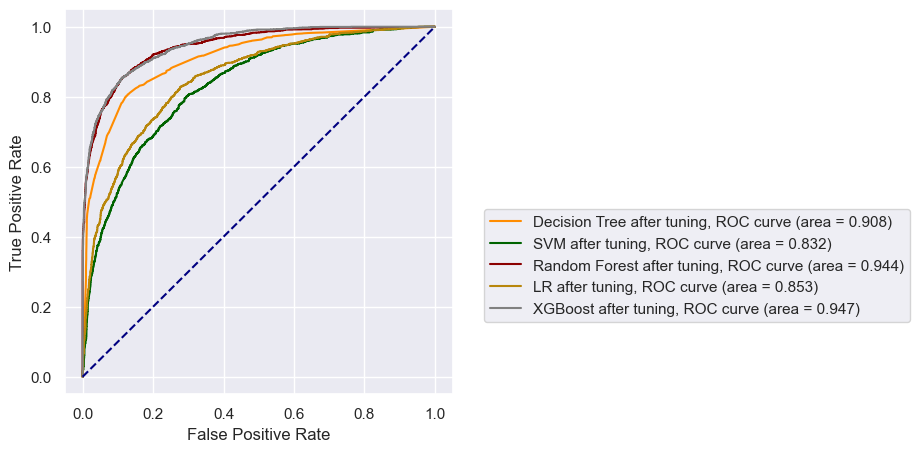

In [75]:
plt.figure()
plt.plot(fpr_dt2, tpr_dt2, color='darkorange', label='Decision Tree after tuning, ROC curve (area = %0.3f)' %  auc_dt2)
plt.plot(fpr_svm2, tpr_svm2, color='darkgreen', label='SVM after tuning, ROC curve (area = %0.3f)' %  auc_svm2)
plt.plot(fpr_rf2, tpr_rf2, color='darkred', label='Random Forest after tuning, ROC curve (area = %0.3f)' %  auc_rf2)
plt.plot(fpr_lr2, tpr_lr2, color='darkgoldenrod', label='LR after tuning, ROC curve (area = %0.3f)' %  auc_lr2)
plt.plot(fpr_xgb2, tpr_xgb2, color='grey', label='XGBoost after tuning, ROC curve (area = %0.3f)' %  auc_xgb2)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(2.2, 0.5))
plt.show()

We see that the XGBoost gives us the best performance both in terms of accuracy and AUC ROC curve.
Therefore, we will apply to the test dataset the generated prediction based on this model classification method, with its tuned parameters that we have found for its best performance.

In [49]:
# Define the best parameters as we saw in the tuning section:
best_params = {
    'colsample_bytree': 0.7,
    'gamma': 0,
    'learning_rate': 0.05,
    'max_depth': 13,
    'n_estimators': 435,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'subsample': 0.9
}

# Initialize the model with the best parameters
xgb_model = XGBClassifier(**best_params)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
test_predictions = xgb_model.predict(test_df)

# Add the predictions as a new column to the test data
test_df['is_canceled'] = test_predictions

test_df.to_csv("./hotels_test_prediction.csv", index=False)

In [52]:
# DELETE ZC
# Create a dictionary with the data
data = {'ID': ZC_IDTESTCOL, 'is_canceled': test_predictions}

# Create a new dataframe
ZC_df = pd.DataFrame(data)

# Save the dataframe to an Excel file
ZC_df.to_csv('ZC_DATASET.csv', index=False)
